Model Coefficients:
                Coefficient
Hours_Studied      3.000720
Review_Session     1.003616
Accuracy: 0.9200
AUC: 0.9821


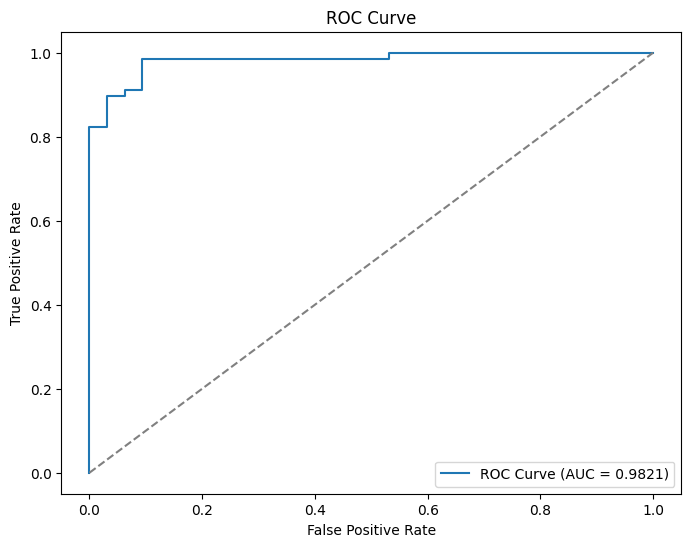

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv("student_data.csv")



X = df.drop(columns=['Results'])
y = df['Results']  # 'Results' is your target variable

# Standardizing the features (important for logistic regression)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize and fit the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_scaled, y)

# Predict probabilities for AUC and ROC
y_pred_prob = model.predict_proba(X_scaled)[:, 1]

# Predict labels for accuracy
y_pred = model.predict(X_scaled)

# Model coefficients
print("Model Coefficients:")
coefficients = pd.DataFrame(model.coef_.flatten(), index=X.columns, columns=["Coefficient"])
print(coefficients)

# Performance metrics
accuracy = accuracy_score(y, y_pred)
auc = roc_auc_score(y, y_pred_prob)

print(f"Accuracy: {accuracy:.4f}")
print(f"AUC: {auc:.4f}")

# ROC Curve
fpr, tpr, thresholds = roc_curve(y, y_pred_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


In [8]:
# Print the column names to identify the target column
print(df.columns)


Index(['Hours_Studied', 'Review_Session', 'Results'], dtype='object')


In [6]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Load dataset
student_data = pd.read_csv('student_data.csv')

# Assume the last column is the target variable
y = student_data.iloc[:, -1]
X = student_data.iloc[:, :-1]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train SVM with Linear Kernel
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train, y_train)
y_pred_linear = svm_linear.predict(X_test)

print("Linear Kernel SVM Performance:")
print(classification_report(y_test, y_pred_linear))

# Train SVM with RBF Kernel using Grid Search for Gamma
param_grid = {'gamma': [0.001, 0.01, 0.1, 1, 10, 100], 'C': [0.1, 1, 10, 100]}
grid_search = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best model
best_svm_rbf = grid_search.best_estimator_
y_pred_rbf = best_svm_rbf.predict(X_test)

print("Best gamma parameter using k-fold cross-validation:")
print(grid_search.best_params_)

print("RBF Kernel SVM Performance:")
print(classification_report(y_test, y_pred_rbf))


Linear Kernel SVM Performance:
              precision    recall  f1-score   support

           0       0.71      0.83      0.77         6
           1       0.92      0.86      0.89        14

    accuracy                           0.85        20
   macro avg       0.82      0.85      0.83        20
weighted avg       0.86      0.85      0.85        20

Best gamma parameter using k-fold cross-validation:
{'C': 1, 'gamma': 1}
RBF Kernel SVM Performance:
              precision    recall  f1-score   support

           0       0.71      0.83      0.77         6
           1       0.92      0.86      0.89        14

    accuracy                           0.85        20
   macro avg       0.82      0.85      0.83        20
weighted avg       0.86      0.85      0.85        20

